In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Load the dataset
data = pd.read_csv(r'/Users/snrt1/Desktop/TV_Laayoune_Data_CIAUMED.csv')

In [19]:
data

,Program Name,Genre Program,Number of viewers,Audience share (%),Start time,Broadcasting date
0,Hiraf,Capsule,9411,27.0,06:54:46,2023-04-22
1,Assrisser Dahbo,Series,30652,21.0,15:52:00,2023-04-17
2,Maa Naha,Cultural,8330,23.0,15:45:27,2023-04-11
3,alfich,Games,6082,14.0,06:39:51,2023-04-03
4,Maa Naha,Cultural,10785,34.0,20:43:07,2023-04-03
...,...,...,...,...,...,...
5135,Assrisser Dahbo,Series,21646,39.0,01:10:00,2020-01-06
5136,Makam mina tarab hassani,Music,29416,38.0,09:14:00,2020-01-05
5137,Journal Télévisé,News,16790,39.0,22:30:00,2020-01-02
5138,Fada Ryadi,Sport,10455,27.0,13:05:52,2020-01-02


In [20]:
data.dtypes

Program Name           object
Genre Program          object
Number of viewers       int64
Audience share (%)    float64
Start time             object
Broadcasting date      object
dtype: object

In [21]:
data['Broadcasting date'] = data['Broadcasting date'].astype('datetime64[ns]')

In [22]:
data.dtypes

Program Name                  object
Genre Program                 object
Number of viewers              int64
Audience share (%)           float64
Start time                    object
Broadcasting date     datetime64[ns]
dtype: object

In [23]:
# Convert the "Broadcasting date" column to datetime format
data["Broadcasting date"] = pd.to_datetime(data["Broadcasting date"], format="%d/%m/%Y")

In [24]:
data.dtypes

Program Name                  object
Genre Program                 object
Number of viewers              int64
Audience share (%)           float64
Start time                    object
Broadcasting date     datetime64[ns]
dtype: object

In [25]:
data

,Program Name,Genre Program,Number of viewers,Audience share (%),Start time,Broadcasting date
0,Hiraf,Capsule,9411,27.0,06:54:46,2023-04-22
1,Assrisser Dahbo,Series,30652,21.0,15:52:00,2023-04-17
2,Maa Naha,Cultural,8330,23.0,15:45:27,2023-04-11
3,alfich,Games,6082,14.0,06:39:51,2023-04-03
4,Maa Naha,Cultural,10785,34.0,20:43:07,2023-04-03
...,...,...,...,...,...,...
5135,Assrisser Dahbo,Series,21646,39.0,01:10:00,2020-01-06
5136,Makam mina tarab hassani,Music,29416,38.0,09:14:00,2020-01-05
5137,Journal Télévisé,News,16790,39.0,22:30:00,2020-01-02
5138,Fada Ryadi,Sport,10455,27.0,13:05:52,2020-01-02


In [28]:
data['Start time'] = data['Start time'].str.replace(" ", "")
data

,Program Name,Genre Program,Number of viewers,Audience share (%),Start time,Broadcasting date,Broadcasting year,Broadcasting month,Broadcasting day
0,Hiraf,Capsule,9411,27.0,06:54:46,2023-04-22,2023,4,22
1,Assrisser Dahbo,Series,30652,21.0,15:52:00,2023-04-17,2023,4,17
2,Maa Naha,Cultural,8330,23.0,15:45:27,2023-04-11,2023,4,11
3,alfich,Games,6082,14.0,06:39:51,2023-04-03,2023,4,3
4,Maa Naha,Cultural,10785,34.0,20:43:07,2023-04-03,2023,4,3
...,...,...,...,...,...,...,...,...,...
5135,Assrisser Dahbo,Series,21646,39.0,01:10:00,2020-01-06,2020,1,6
5136,Makam mina tarab hassani,Music,29416,38.0,09:14:00,2020-01-05,2020,1,5
5137,Journal Télévisé,News,16790,39.0,22:30:00,2020-01-02,2020,1,2
5138,Fada Ryadi,Sport,10455,27.0,13:05:52,2020-01-02,2020,1,2


In [29]:
# Create separate columns for year, month, and day
data["Broadcasting year"] = data["Broadcasting date"].dt.year
data["Broadcasting month"] = data["Broadcasting date"].dt.month
data["Broadcasting day"] = data["Broadcasting date"].dt.day

# Convert the "Start time" column to datetime format
data["Start time"] = pd.to_datetime(data["Start time"], format="%H:%M:%S")

# Create separate columns for hour, minute, and second
data["Start hour"] = data["Start time"].dt.hour
data["Start minute"] = data["Start time"].dt.minute
data["Start second"] = data["Start time"].dt.second

In [30]:
data

,Program Name,Genre Program,Number of viewers,Audience share (%),Start time,Broadcasting date,Broadcasting year,Broadcasting month,Broadcasting day,Start hour,Start minute,Start second
0,Hiraf,Capsule,9411,27.0,1900-01-01 06:54:46,2023-04-22,2023,4,22,6,54,46
1,Assrisser Dahbo,Series,30652,21.0,1900-01-01 15:52:00,2023-04-17,2023,4,17,15,52,0
2,Maa Naha,Cultural,8330,23.0,1900-01-01 15:45:27,2023-04-11,2023,4,11,15,45,27
3,alfich,Games,6082,14.0,1900-01-01 06:39:51,2023-04-03,2023,4,3,6,39,51
4,Maa Naha,Cultural,10785,34.0,1900-01-01 20:43:07,2023-04-03,2023,4,3,20,43,7
...,...,...,...,...,...,...,...,...,...,...,...,...
5135,Assrisser Dahbo,Series,21646,39.0,1900-01-01 01:10:00,2020-01-06,2020,1,6,1,10,0
5136,Makam mina tarab hassani,Music,29416,38.0,1900-01-01 09:14:00,2020-01-05,2020,1,5,9,14,0
5137,Journal Télévisé,News,16790,39.0,1900-01-01 22:30:00,2020-01-02,2020,1,2,22,30,0
5138,Fada Ryadi,Sport,10455,27.0,1900-01-01 13:05:52,2020-01-02,2020,1,2,13,5,52


In [31]:
del data["Start second"]

In [32]:
data

,Program Name,Genre Program,Number of viewers,Audience share (%),Start time,Broadcasting date,Broadcasting year,Broadcasting month,Broadcasting day,Start hour,Start minute
0,Hiraf,Capsule,9411,27.0,1900-01-01 06:54:46,2023-04-22,2023,4,22,6,54
1,Assrisser Dahbo,Series,30652,21.0,1900-01-01 15:52:00,2023-04-17,2023,4,17,15,52
2,Maa Naha,Cultural,8330,23.0,1900-01-01 15:45:27,2023-04-11,2023,4,11,15,45
3,alfich,Games,6082,14.0,1900-01-01 06:39:51,2023-04-03,2023,4,3,6,39
4,Maa Naha,Cultural,10785,34.0,1900-01-01 20:43:07,2023-04-03,2023,4,3,20,43
...,...,...,...,...,...,...,...,...,...,...,...
5135,Assrisser Dahbo,Series,21646,39.0,1900-01-01 01:10:00,2020-01-06,2020,1,6,1,10
5136,Makam mina tarab hassani,Music,29416,38.0,1900-01-01 09:14:00,2020-01-05,2020,1,5,9,14
5137,Journal Télévisé,News,16790,39.0,1900-01-01 22:30:00,2020-01-02,2020,1,2,22,30
5138,Fada Ryadi,Sport,10455,27.0,1900-01-01 13:05:52,2020-01-02,2020,1,2,13,5


In [33]:
data.dtypes

Program Name                  object
Genre Program                 object
Number of viewers              int64
Audience share (%)           float64
Start time            datetime64[ns]
Broadcasting date     datetime64[ns]
Broadcasting year              int64
Broadcasting month             int64
Broadcasting day               int64
Start hour                     int64
Start minute                   int64
dtype: object

In [34]:
data.duplicated().sum()

0

In [35]:
program_dict = data.groupby(['Program Name'])['Number of viewers'].median().to_dict()
data['Programs'] = data['Program Name'].map(program_dict)

In [36]:
data

,Program Name,Genre Program,Number of viewers,Audience share (%),Start time,Broadcasting date,Broadcasting year,Broadcasting month,Broadcasting day,Start hour,Start minute,Programs
0,Hiraf,Capsule,9411,27.0,1900-01-01 06:54:46,2023-04-22,2023,4,22,6,54,9600.0
1,Assrisser Dahbo,Series,30652,21.0,1900-01-01 15:52:00,2023-04-17,2023,4,17,15,52,10045.0
2,Maa Naha,Cultural,8330,23.0,1900-01-01 15:45:27,2023-04-11,2023,4,11,15,45,9778.0
3,alfich,Games,6082,14.0,1900-01-01 06:39:51,2023-04-03,2023,4,3,6,39,10573.0
4,Maa Naha,Cultural,10785,34.0,1900-01-01 20:43:07,2023-04-03,2023,4,3,20,43,9778.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5135,Assrisser Dahbo,Series,21646,39.0,1900-01-01 01:10:00,2020-01-06,2020,1,6,1,10,10045.0
5136,Makam mina tarab hassani,Music,29416,38.0,1900-01-01 09:14:00,2020-01-05,2020,1,5,9,14,9822.0
5137,Journal Télévisé,News,16790,39.0,1900-01-01 22:30:00,2020-01-02,2020,1,2,22,30,9829.0
5138,Fada Ryadi,Sport,10455,27.0,1900-01-01 13:05:52,2020-01-02,2020,1,2,13,5,9659.5


In [39]:
len(data["Program Name"].value_counts())

31

In [40]:
len(data["Genre Program"].value_counts())

12

In [43]:
data["Program Name"].unique()

array(['Hiraf', 'Assrisser Dahbo', 'Maa Naha', 'alfich',
       'Journal Télévisé', 'Touratak Lak', 'Kadaya ramadaniya',
       'Lamassat Nissaiya', 'Layali Lafrig', 'Nabdou Al Moujtamaa',
       'Tarab', 'Agenda', 'Konoz mina sahrae', 'samar albidan', 'Amnir',
       'Makam mina tarab hassani', 'Midadou chouaara', 'Sahil aljanoubi',
       'bissmilahi lahi namdeh', 'Mahattat', 'Mina Dakira sahraouya',
       'Fada Ryadi', 'Oum Rjal', 'Aljamal bima hamal', 'Maa Nass',
       'Mahadra', 'Sibak Kawafi', 'Mina alassima',
       'Sahafatou Al ousbouaa', 'Mara oa Al Hayat', 'Quiz Quran'],
      dtype=object)

In [44]:
data["Genre Program"].unique()

array(['Capsule', 'Series', 'Cultural', 'Games', 'News', 'Religious',
       "Women's programs", 'Music', 'Information', 'Documentaries',
       'Sport', 'Politics'], dtype=object)

In [45]:
Max_Program = data['Genre Program'].value_counts().sort_values(ascending=False)[0:20]
Max_Program.name = 'Count'
Max_Program.index.name = 'Name_Program'

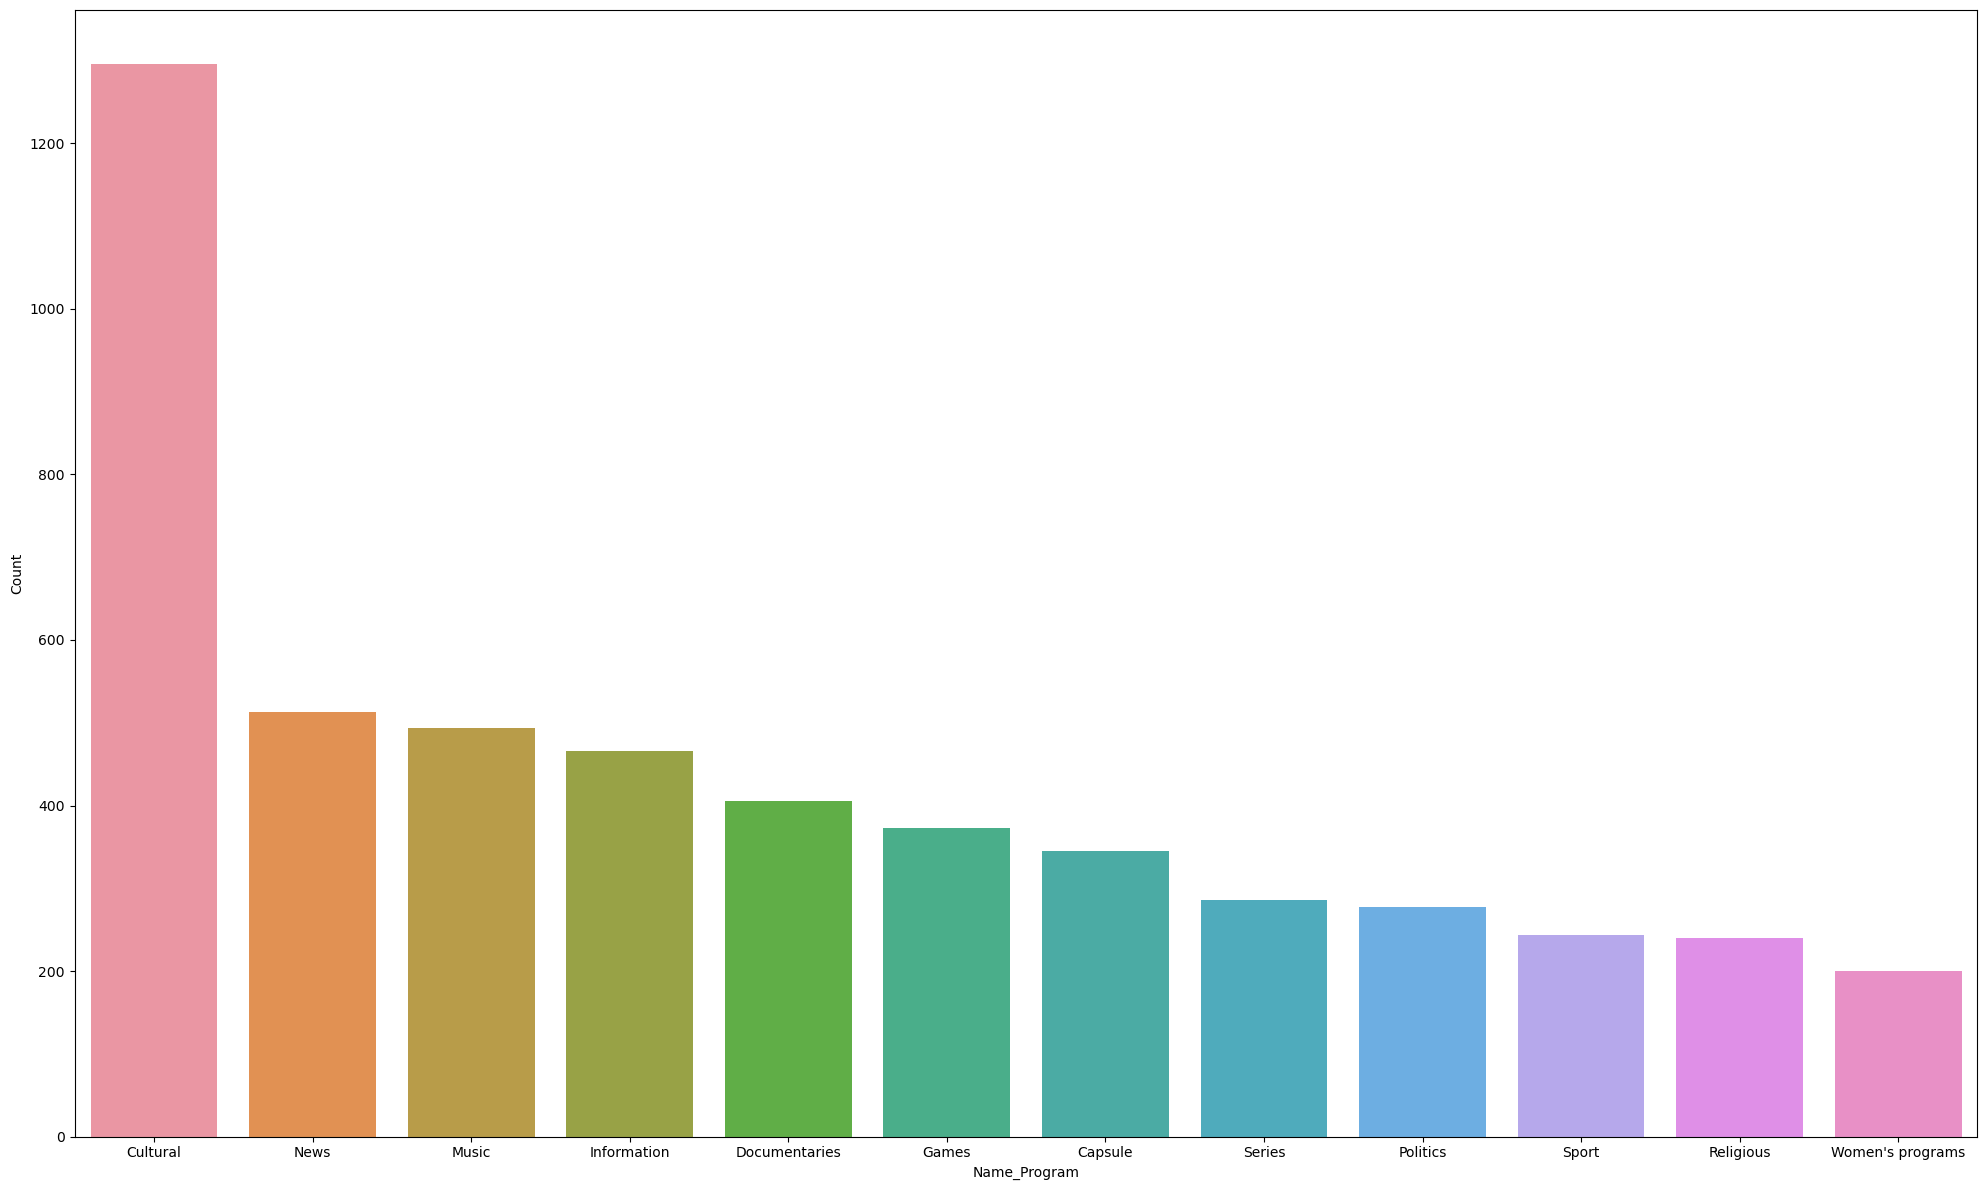

In [48]:
fig = plt.figure(figsize=(20,12))
sns.barplot(x=Max_Program.index,y= Max_Program)
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(y=data['Programs'],x=data['Program'])
plt.xticks(rotation=90)